### import statements

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import cross_validation
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot    
import plotly.graph_objs as go
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.cross_validation import train_test_split
import keras

In [29]:
#loading data into pandas
female = pd.read_csv('female.txt', header=None)
male = pd.read_csv('male.txt', header=None)
female.columns=['name']
male.columns=['name']


In [30]:
#adding gender columns and concatenating two frames
female['gender'] = 'f'
male['gender'] = 'm'
frames = [female,male]
names = pd.concat(frames).reset_index()
#names.reset_index()
names.drop(names[['index']],axis = 1,inplace = True)
names

,name,gender
0,Abagael,f
1,Abagail,f
2,Abbe,f
3,Abbey,f
4,Abbi,f
5,Abbie,f
6,Abby,f
7,Abigael,f
8,Abigail,f
9,Abigale,f


In [31]:
names['name'] = names['name'].str.lower()
names

,name,gender
0,abagael,f
1,abagail,f
2,abbe,f
3,abbey,f
4,abbi,f
5,abbie,f
6,abby,f
7,abigael,f
8,abigail,f
9,abigale,f


In [32]:
# setting parameters
batch_size = 10
num_classes = 2
epochs = 10
#early stopping
z = [keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=3, verbose=1, mode='max')]

In [33]:
# finding maximum length of the name
field_length = names.name.astype(str).map(len)
print(len(names.loc[field_length.argmax(), 'name']))

15


In [34]:
# function for finding ascii values
def ascii(df):
    names = df
    ascii = []
    for c in names['name']:
        s = [ord(s) for s in c]
        while(len(s)<15):
            s.append(0)
        ascii.append(s)
    return ascii    

In [35]:
# taking f values as 0 and m values as 1
f= names[names['gender']=='f']
f['gender'] = 0
m= names[names['gender']=='m']
m['gender'] = 1



/home/user/classification/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/user/classification/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [36]:
frames = [f,m]
final_dataset = pd.concat(frames).reset_index()
#names.reset_index()
final_dataset.drop(final_dataset[['index']],axis = 1,inplace = True)
final_dataset

,name,gender
0,abagael,0
1,abagail,0
2,abbe,0
3,abbey,0
4,abbi,0
5,abbie,0
6,abby,0
7,abigael,0
8,abigail,0
9,abigale,0


In [37]:
#test-train split
x_train, x_test = train_test_split(final_dataset, train_size = 0.8)
y_train = pd.DataFrame(x_train['gender'])
y_test = pd.DataFrame(x_test['gender'])
x_train.drop(['gender'],axis=1,inplace=True)
x_test.drop(['gender'],axis=1,inplace=True)

/home/user/classification/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/user/classification/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [38]:
type(x_train)

pandas.core.frame.DataFrame

In [39]:
#xtrain = np.array(ascii(x_train))/255
#xtest = np.array(ascii(x_test))/255
xtrain = np.array(ascii(x_train))
xtest = np.array(ascii(x_test))
xtrain = (xtrain-97)/26
xtest = (xtest-97)/26
ytrain = y_train.values.tolist()
ytrain = keras.utils.to_categorical(ytrain, num_classes)
#ytrain


In [48]:
xtest

array([[ 0.42307692,  0.15384615,  0.30769231, ..., -3.73076923,
        -3.73076923, -3.73076923],
       [ 0.26923077,  0.        ,  0.5       , ..., -3.73076923,
        -3.73076923, -3.73076923],
       [ 0.38461538,  0.        ,  0.73076923, ..., -3.73076923,
        -3.73076923, -3.73076923],
       ..., 
       [ 0.46153846,  0.15384615,  0.65384615, ..., -3.73076923,
        -3.73076923, -3.73076923],
       [ 0.        ,  0.30769231,  0.42307692, ..., -3.73076923,
        -3.73076923, -3.73076923],
       [ 0.11538462,  0.53846154,  0.15384615, ..., -3.73076923,
        -3.73076923, -3.73076923]])

### Function for plotting the graph

In [41]:
def plotting(model_1):
    plt.plot(model_1.history['acc'])
    plt.plot(model_1.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(model_1.history['loss'])
    plt.plot(model_1.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Model_1 1 hidden layer

Train on 5084 samples, validate on 1271 samples
Epoch 1/10
3s - loss: 0.6785 - acc: 0.6100 - val_loss: 0.6406 - val_acc: 0.6389
Epoch 2/10
3s - loss: 0.6489 - acc: 0.6375 - val_loss: 0.6512 - val_acc: 0.6538
Epoch 3/10
3s - loss: 0.6292 - acc: 0.6515 - val_loss: 0.6809 - val_acc: 0.5751
Epoch 4/10
3s - loss: 0.6163 - acc: 0.6672 - val_loss: 0.5979 - val_acc: 0.6814
Epoch 5/10
3s - loss: 0.6065 - acc: 0.6701 - val_loss: 0.6254 - val_acc: 0.6397
Epoch 6/10
2s - loss: 0.6046 - acc: 0.6749 - val_loss: 0.5994 - val_acc: 0.6601
Epoch 7/10
2s - loss: 0.6034 - acc: 0.6705 - val_loss: 0.5888 - val_acc: 0.6814
Epoch 8/10
3s - loss: 0.5953 - acc: 0.6780 - val_loss: 0.5875 - val_acc: 0.6790
Epoch 00007: early stopping


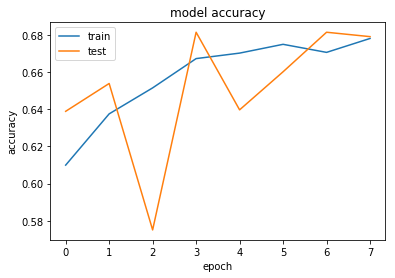

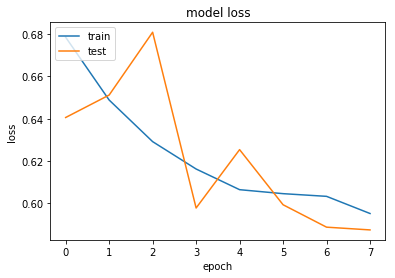

In [42]:
model1 = Sequential()
model1.add(Dense(600, activation='relu', input_shape=(15,)))
model1.add(Dense(500, activation='relu'))
model1.add(Dense(2, activation='softmax'))
model1.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics = ['accuracy'])
model_1 = model1.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks = z)
plotting(model_1)

### Model_2 2 hidden layers

Train on 5084 samples, validate on 1271 samples
Epoch 1/10
6s - loss: 0.6845 - acc: 0.6139 - val_loss: 0.6558 - val_acc: 0.6357
Epoch 2/10
6s - loss: 0.6626 - acc: 0.6223 - val_loss: 0.6598 - val_acc: 0.5940
Epoch 3/10
6s - loss: 0.6509 - acc: 0.6328 - val_loss: 0.6398 - val_acc: 0.6554
Epoch 4/10
5s - loss: 0.6310 - acc: 0.6530 - val_loss: 0.5972 - val_acc: 0.6829
Epoch 5/10
5s - loss: 0.6173 - acc: 0.6619 - val_loss: 0.6154 - val_acc: 0.6790
Epoch 6/10
5s - loss: 0.6104 - acc: 0.6717 - val_loss: 0.5934 - val_acc: 0.6743
Epoch 7/10
5s - loss: 0.6060 - acc: 0.6715 - val_loss: 0.6101 - val_acc: 0.6845
Epoch 8/10
5s - loss: 0.6082 - acc: 0.6725 - val_loss: 0.5952 - val_acc: 0.6743
Epoch 00007: early stopping


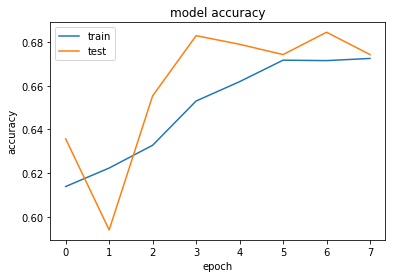

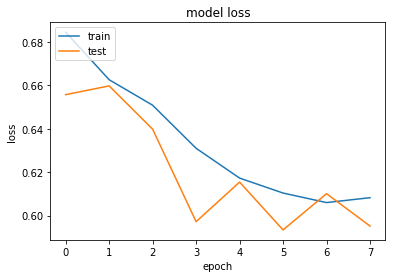

In [43]:
model2 = Sequential()
model2.add(Dense(400, activation='relu', input_shape=(15,)))
model2.add(Dense(500, activation='relu'))
model2.add(Dense(700, activation='relu'))
model2.add(Dense(2, activation='softmax'))
model2.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics = ['accuracy'])
model_2 = model2.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks = z)
plotting(model_2)

### Model_3 3 hidden layers

Train on 5084 samples, validate on 1271 samples
Epoch 1/10
4s - loss: 0.6762 - acc: 0.6184 - val_loss: 0.6624 - val_acc: 0.6357
Epoch 2/10
3s - loss: 0.6629 - acc: 0.6233 - val_loss: 0.6479 - val_acc: 0.6381
Epoch 3/10
3s - loss: 0.6500 - acc: 0.6336 - val_loss: 0.6484 - val_acc: 0.6404
Epoch 4/10
3s - loss: 0.6322 - acc: 0.6448 - val_loss: 0.6434 - val_acc: 0.5987
Epoch 5/10
3s - loss: 0.6261 - acc: 0.6568 - val_loss: 0.6254 - val_acc: 0.6577
Epoch 6/10
3s - loss: 0.6131 - acc: 0.6607 - val_loss: 0.6638 - val_acc: 0.6648
Epoch 7/10
3s - loss: 0.6086 - acc: 0.6733 - val_loss: 0.6103 - val_acc: 0.6711
Epoch 8/10
3s - loss: 0.6034 - acc: 0.6727 - val_loss: 0.5943 - val_acc: 0.6876
Epoch 9/10
3s - loss: 0.6030 - acc: 0.6788 - val_loss: 0.5952 - val_acc: 0.6821
Epoch 10/10
3s - loss: 0.5959 - acc: 0.6835 - val_loss: 0.6329 - val_acc: 0.6562
Epoch 00007: early stopping


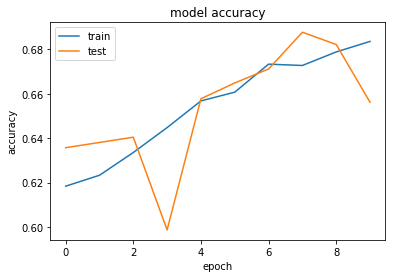

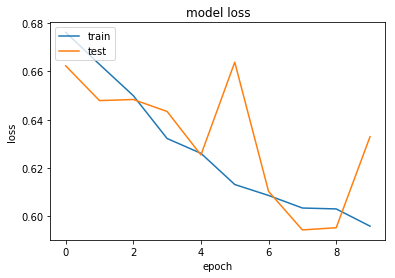

In [44]:
model3 = Sequential()
model3.add(Dense(200, activation='relu', input_shape=(15,)))
model3.add(Dense(300, activation='relu'))
model3.add(Dense(400, activation='relu'))
model3.add(Dense(500, activation='relu'))
model3.add(Dense(2, activation='softmax'))
model3.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics = ['accuracy'])
model_3 = model3.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks = z)
plotting(model_3)

### Model_4 4 hidden layers

Train on 5084 samples, validate on 1271 samples
Epoch 1/10
9s - loss: 0.6809 - acc: 0.6208 - val_loss: 0.6639 - val_acc: 0.6357
Epoch 2/10
9s - loss: 0.6675 - acc: 0.6241 - val_loss: 0.6595 - val_acc: 0.6357
Epoch 3/10
9s - loss: 0.6656 - acc: 0.6243 - val_loss: 0.6574 - val_acc: 0.6357
Epoch 4/10
8s - loss: 0.6649 - acc: 0.6233 - val_loss: 0.6661 - val_acc: 0.6357
Epoch 5/10
9s - loss: 0.6632 - acc: 0.6237 - val_loss: 0.6552 - val_acc: 0.6357
Epoch 00004: early stopping


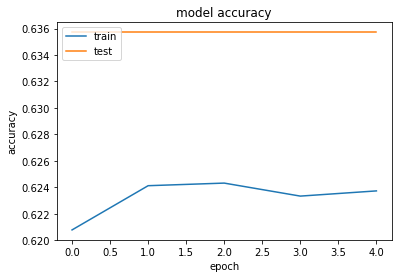

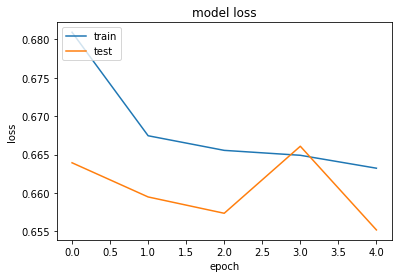

In [45]:
model4 = Sequential()
model4.add(Dense(300, activation='relu', input_shape=(15,)))
model4.add(Dense(400, activation='relu'))
model4.add(Dense(500, activation='relu'))
model4.add(Dense(600, activation='relu'))
model4.add(Dense(700, activation='relu'))
model4.add(Dense(2, activation='softmax'))
model4.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics = ['accuracy'])
model_4 = model4.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks = z)
plotting(model_4)

### Model_5 5 hidden layers

Train on 5084 samples, validate on 1271 samples
Epoch 1/10
15s - loss: 0.6875 - acc: 0.6214 - val_loss: 0.6518 - val_acc: 0.6357
Epoch 2/10
14s - loss: 0.6662 - acc: 0.6247 - val_loss: 0.6554 - val_acc: 0.6357
Epoch 3/10
14s - loss: 0.6635 - acc: 0.6227 - val_loss: 0.6547 - val_acc: 0.6389
Epoch 4/10
15s - loss: 0.6520 - acc: 0.6400 - val_loss: 0.6376 - val_acc: 0.6546
Epoch 5/10
14s - loss: 0.6350 - acc: 0.6469 - val_loss: 0.6188 - val_acc: 0.6530
Epoch 6/10
14s - loss: 0.6246 - acc: 0.6579 - val_loss: 0.6103 - val_acc: 0.6790
Epoch 7/10
15s - loss: 0.6203 - acc: 0.6656 - val_loss: 0.6269 - val_acc: 0.6341
Epoch 8/10
14s - loss: 0.6214 - acc: 0.6591 - val_loss: 0.5966 - val_acc: 0.6751
Epoch 9/10
14s - loss: 0.6098 - acc: 0.6668 - val_loss: 0.6207 - val_acc: 0.6790
Epoch 10/10
15s - loss: 0.6080 - acc: 0.6692 - val_loss: 0.5970 - val_acc: 0.6719
Epoch 00009: early stopping


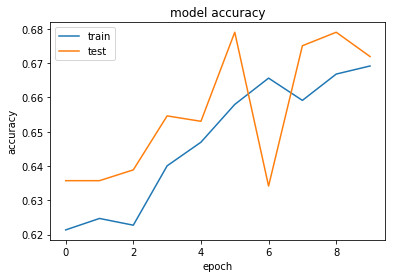

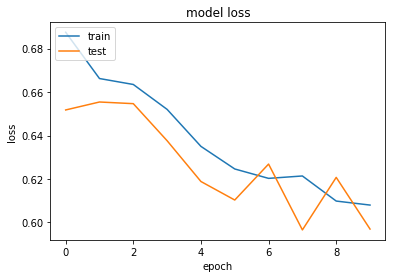

In [46]:
model5 = Sequential()
model5.add(Dense(300, activation='relu', input_shape=(15,)))
model5.add(Dense(400, activation='relu'))
model5.add(Dense(500, activation='relu'))
model5.add(Dense(600, activation='relu'))
model5.add(Dense(700, activation='relu'))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(2, activation='softmax'))
model5.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics = ['accuracy'])
model_5 = model5.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks = z)
plotting(model_5)

In [47]:
#model1.predict('anand')
def predict(test):
    t = []
    s = [ord(s) for s in test]
    t.append(s)
    xp = np.array(t)
    xp = (xp-97)/26
    print(xp)
    model1.predict(xp)
predict('anand')    

[[ 0.          0.5         0.          0.5         0.11538462]]


ValueError: Error when checking : expected dense_4_input to have shape (None, 15) but got array with shape (1, 5)

In [49]:
model1.predict(xtest)

array([[ 0.62482351,  0.37517649],
       [ 0.83484626,  0.16515373],
       [ 0.79521722,  0.20478278],
       ..., 
       [ 0.89795732,  0.10204259],
       [ 0.82033789,  0.17966211],
       [ 0.35217878,  0.64782125]], dtype=float32)

In [50]:
xtest

array([[ 0.42307692,  0.15384615,  0.30769231, ..., -3.73076923,
        -3.73076923, -3.73076923],
       [ 0.26923077,  0.        ,  0.5       , ..., -3.73076923,
        -3.73076923, -3.73076923],
       [ 0.38461538,  0.        ,  0.73076923, ..., -3.73076923,
        -3.73076923, -3.73076923],
       ..., 
       [ 0.46153846,  0.15384615,  0.65384615, ..., -3.73076923,
        -3.73076923, -3.73076923],
       [ 0.        ,  0.30769231,  0.42307692, ..., -3.73076923,
        -3.73076923, -3.73076923],
       [ 0.11538462,  0.53846154,  0.15384615, ..., -3.73076923,
        -3.73076923, -3.73076923]])